In [80]:
import dill
from main.manipulation import Manipulation
from main.data_processing import evaluate_profile
import pandas as pd
import numpy as np
from main.manipulation_utils import get_children_generation_options, check_transitivity, one_cost_children_generation, useful_change
from IPython.display import display
from copy import copy
from matplotlib import pyplot as plt
import seaborn as sns
import os

# variables we need to keep during datapoints generation
- num of rounds for convergence (per profile and random_run)
- converged or not (per round and profile and random_run)
- winner (per round to be safe, although we actually need only at round 0 (truthful winner) and at final round) (per round and profile and random_run)

In [ ]:
PKGS="php7-openssl-7.3.19-r0  php7-common-7.3.19-r0  php7-fpm-7.3.19-r0  php7-opcache-7.3.19-r0 php7-7.3.19-r0"
for p in $PKGS
do
   echo "Installing $p package"
   sudo apk add "$p"
done

In [ ]:
assert num_voters in [10, 20, 50]
assert num_alt in [3, 5, 7]
assert data_type in ['2urn', 'ic']

In [ ]:
for num_alt in 3 5 7
do
    for d_type in "2urn" "ic"
    do 
        for num_vot in 10 20 50
        do
            python orchestration.py --num_alt ${num_alt} --num_voter ${num_vot} --data_type ${d_type}
        done
    done
done

## data load and set-up

In [88]:
if os.path.isfile('data/results/total_result.pkl'):
    with open('data/results/total_result.pkl', 'rb') as f:
        total_result = dill.load(f)

In [89]:
total_result

{(3, 10, '2urn', 5, 1, 'approval', 100, 1, True, True, True): (True, {}),
 (3, 10, 'ic', 0, 1, 'approval', 100, 0, True, True, True): (True, {}),
 (3, 10, 'ic', 0, 1, 'approval', 100, 1, True, True, True): (True, {}),
 (3, 10, 'ic', 0, 1, 'approval', 100, 2, True, True, True): (True, {}),
 (3, 10, 'ic', 1, 1, 'approval', 100, 0, True, True, True): (True, {}),
 (3, 10, 'ic', 1, 1, 'approval', 100, 1, True, True, True): (True, {}),
 (3, 10, 'ic', 1, 1, 'approval', 100, 2, True, True, True): (True, {}),
 (3, 10, 'ic', 2, 1, 'approval', 100, 0, True, True, True): (True, {}),
 (3, 10, 'ic', 2, 1, 'approval', 100, 1, True, True, True): (True, {}),
 (3, 10, 'ic', 2, 1, 'approval', 100, 2, True, True, True): (True, {}),
 (3, 10, 'ic', 3, 1, 'approval', 100, 0, True, True, True): (True, {}),
 (3, 10, 'ic', 3, 1, 'approval', 100, 1, True, True, True): (True, {}),
 (3, 10, 'ic', 3, 1, 'approval', 100, 2, True, True, True): (True, {}),
 (3, 10, 'ic', 4, 1, 'approval', 100, 0, True, True, True): (T

In [74]:
with open('data/results/convergence_rounds_20_7_ic.pkl', 'rb') as f:
    res = dill.load(f)

(array([122.,   0.,   0.,   0.,   0.,   0.,  11.,   0.,   0.,   0.,   0.,
          0.,  21.,   0.,   0.,   0.,   0.,   0.,  26.,   0.,   0.,   0.,
          0.,   0.,   0.,  12.,   0.,   0.,   0.,   0.,   0.,   6.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.  , 0.16, 0.32, 0.48, 0.64, 0.8 , 0.96, 1.12, 1.28, 1.44, 1.6 ,
        1.76, 1.92, 2.08, 2.24, 2.4 , 2.56, 2.72, 2.88, 3.04, 3.2 , 3.36,
        3.52, 3.68, 3.84, 4.  , 4.16, 4.32, 4.48, 4.64, 4.8 , 4.96, 5.12,
        5.28, 5.44, 5.6 , 5.76, 5.92, 6.08, 6.24, 6.4 , 6.56, 6.72, 6.88,
        7.04, 7.2 , 7.36, 7.52, 7.68, 7.84, 8.  ]),
 <BarContainer object of 50 artists>)

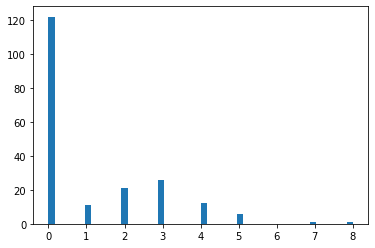

In [78]:
plt.hist(res, bins=50)

In [68]:
num_voters = 10
num_alt = 5
data_type = 'ic'

assert num_voters in [10, 20, 50]
assert num_alt in [3, 5, 7]
assert data_type in ['2urn', 'ic']
alphabetical_order = {}
for i in range(num_alt):
    alphabetical_order[i] = i

In [70]:
cycle_limit=15

In [71]:
k=1
method='approval'

In [ ]:
for random_choice in range(200):
    all_preferences = all_data[(num_voters, num_alt, data_type)][random_choice]
    

In [13]:

convergence_rounds = []
for meta_counter in range(1):
    
    current_profile = copy(all_preferences) # Initialize the current profile of preferences for all voters.to be the same as the truthful profile.
    num_rounds = 0
    failed_manipulators = []
    manipulator_voter=None

    while True:
        random_voter = select_new_random_voter(failed_manipulators, len(all_preferences), manipulator_voter)
        if random_voter is None:
            print(f'Convergence is achieved in {num_rounds} rounds!')
            convergence_rounds.append(num_rounds)
            break
        else:
            pass
#             print(f'\nRandom voter chosen: {random_voter}')

        winner, possible_winners, scores_of_alternatives = evaluate_profile(graphs=current_profile, k=k, method=method, alphabetical_order=alphabetical_order)

        man = Manipulation(
            all_preferences=current_profile,
            preference_idx=random_voter,
            winner=winner,
            truthful_profile=all_preferences,
            possible_winners=possible_winners,
            scores_of_alternatives=scores_of_alternatives,
            alphabetical_order_of_alternatives=alphabetical_order,
            method=method,
            k=k,
            do_additions=True,
            do_omissions=True,
            do_flips=True,
            verbose=False
        )

        result = man.manipulation_move()
        if result is not None:
            current_profile, _ = result
            num_rounds+=1
            if num_rounds > cycle_limit:
                print(f'No convergence for {cycle_limit} rounds. Assumed a cycle.')
                continue
            manipulator_voter=random_voter
        else:
#             print(f'Voter: {random_voter} cannot manipulate.')
            failed_manipulators.append(random_voter)

Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
C

Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
C

Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
C

In [14]:
np.mean(convergence_rounds)

0.0

In [15]:
np.std(convergence_rounds)

0.0

/Users/panos/anaconda3/envs/iterative_voting/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/panos/anaconda3/envs/iterative_voting/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:ylabel='Density'>

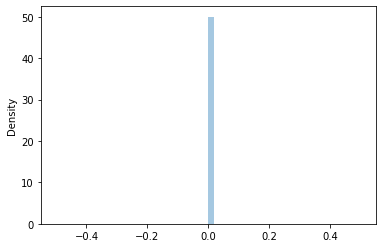

In [16]:
sns.distplot(convergence_rounds, bins=50)